# Halftone Implementation Testing

Testing and fine-tuning the halftone implementation to match the target style:
- Black dots on white background
- Uniform dot sizes (or very similar)
- High contrast, poster-like quality
- Text overlay capability


In [2]:
import sys
from pathlib import Path
import numpy as np
import cv2
from PIL import Image, ImageDraw, ImageFont
import matplotlib.pyplot as plt

# Get the project root and add it to path
project_root = Path.cwd().parent
sys.path.insert(0, str(project_root))

# Now import with the src prefix
from src.core.pre_processing import preprocess_image
from src.core.half_tone import generate_classic_halftone, generate_variable_halftone
from src.config import TARGET_WIDTH, TARGET_HEIGHT

print("Imports successful!")
print(f"Target dimensions: {TARGET_WIDTH}x{TARGET_HEIGHT}")


Imports successful!
Target dimensions: 2160x2700


## Load Test Image

Let's start with a test portrait image to experiment with different halftone parameters.


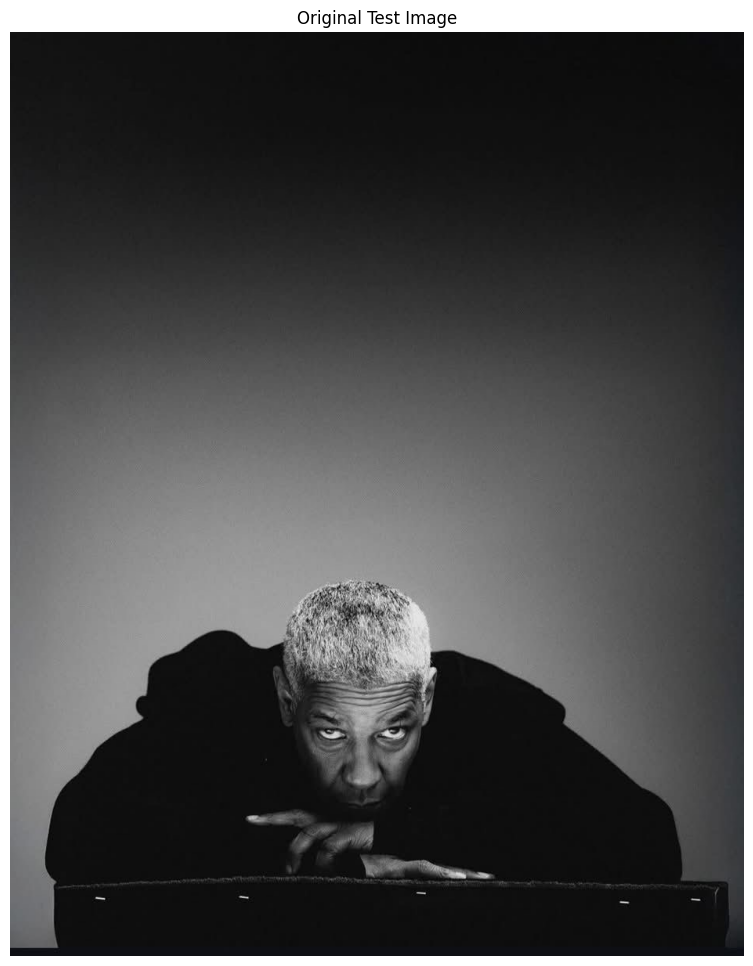

Image loaded: (1180, 937, 3)


In [3]:
# Load test image
test_image_path = '../assets/samples/portrait2.jpg'

# Display original
img = cv2.imread(test_image_path)
if img is not None:
    img_rgb = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
    plt.figure(figsize=(10, 12))
    plt.imshow(img_rgb)
    plt.title('Original Test Image')
    plt.axis('off')
    plt.show()
    print(f"Image loaded: {img_rgb.shape}")
else:
    print(f"Could not load image from {test_image_path}")


## Test 1: Basic Halftone with Inverted Colors (Black dots on white)

This matches the target style - black dots on white background.


Test 1: Basic inverted halftone


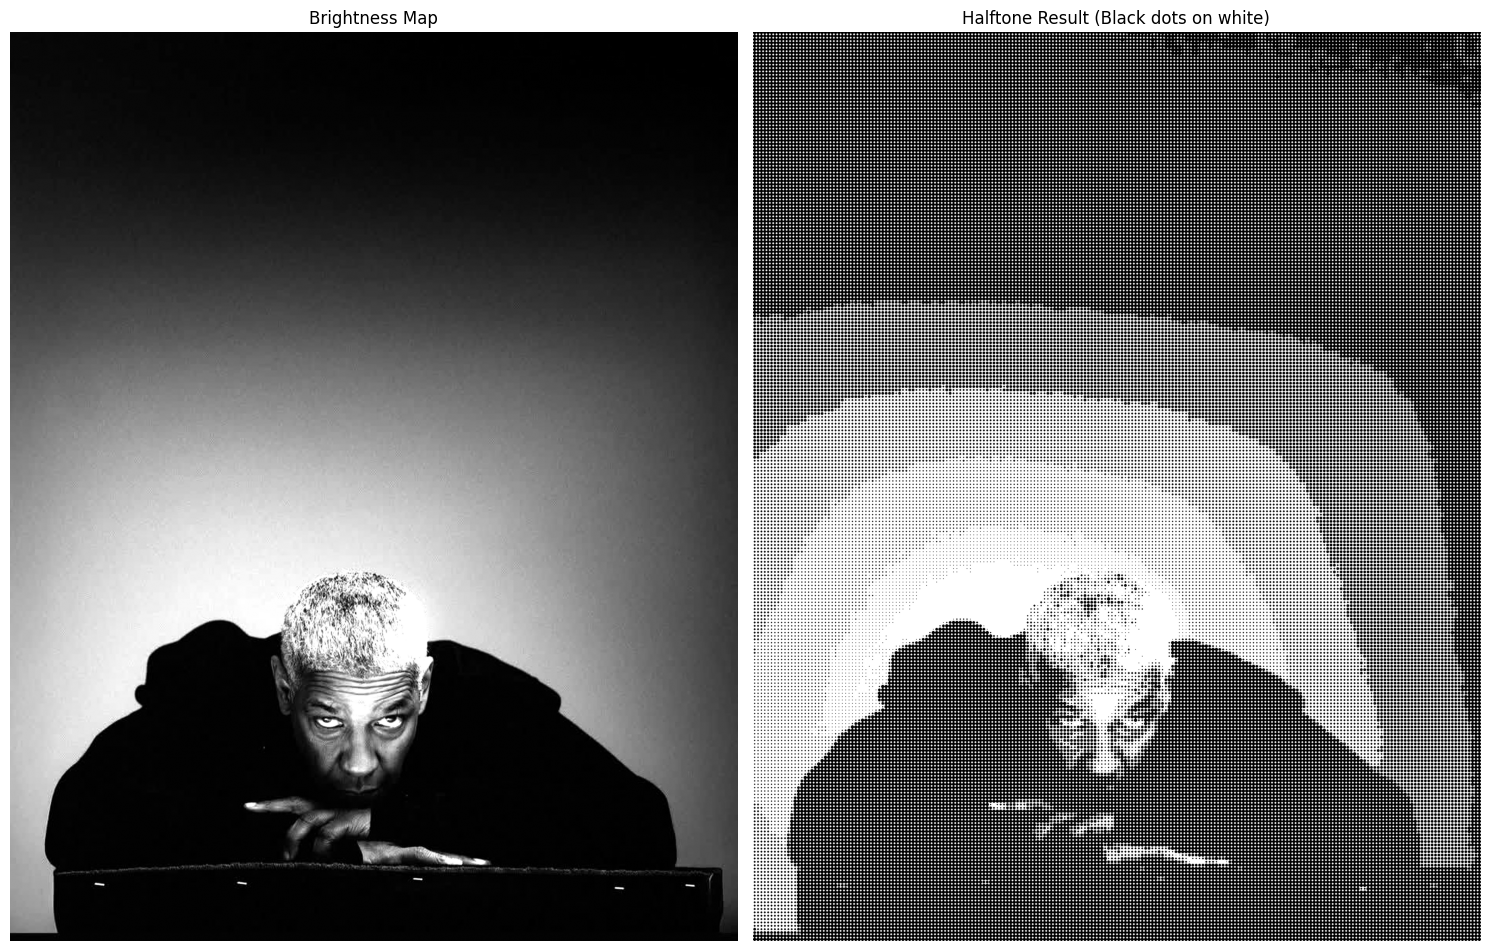

Brightness range: [0.000, 1.000]
Halftone size: (2160, 2700)


In [4]:
# Test 1: Basic inverted halftone (black dots on white)
print("Test 1: Basic inverted halftone")
print("=" * 50)

# Preprocess image
brightness_map = preprocess_image(
    test_image_path,
    TARGET_WIDTH,
    TARGET_HEIGHT,
    gamma=1.2  # Slight contrast boost
)

# Halftone config - start with medium-sized dots
config = {
    "cell_size": 10,  # Grid spacing
    "max_radius": 5   # Maximum dot radius
}

# Inverted colors: white background, black dots
bg_color = (255, 255, 255)  # White
dot_color = (0, 0, 0)        # Black

# Generate halftone
halftone_img = generate_classic_halftone(
    brightness_map,
    config,
    bg_color,
    dot_color
)

# Display
fig, axes = plt.subplots(1, 2, figsize=(15, 18))
axes[0].imshow(brightness_map, cmap='gray')
axes[0].set_title('Brightness Map')
axes[0].axis('off')

axes[1].imshow(halftone_img)
axes[1].set_title('Halftone Result (Black dots on white)')
axes[1].axis('off')

plt.tight_layout()
plt.show()

print(f"Brightness range: [{brightness_map.min():.3f}, {brightness_map.max():.3f}]")
print(f"Halftone size: {halftone_img.size}")


Test 2: Parameter Variations


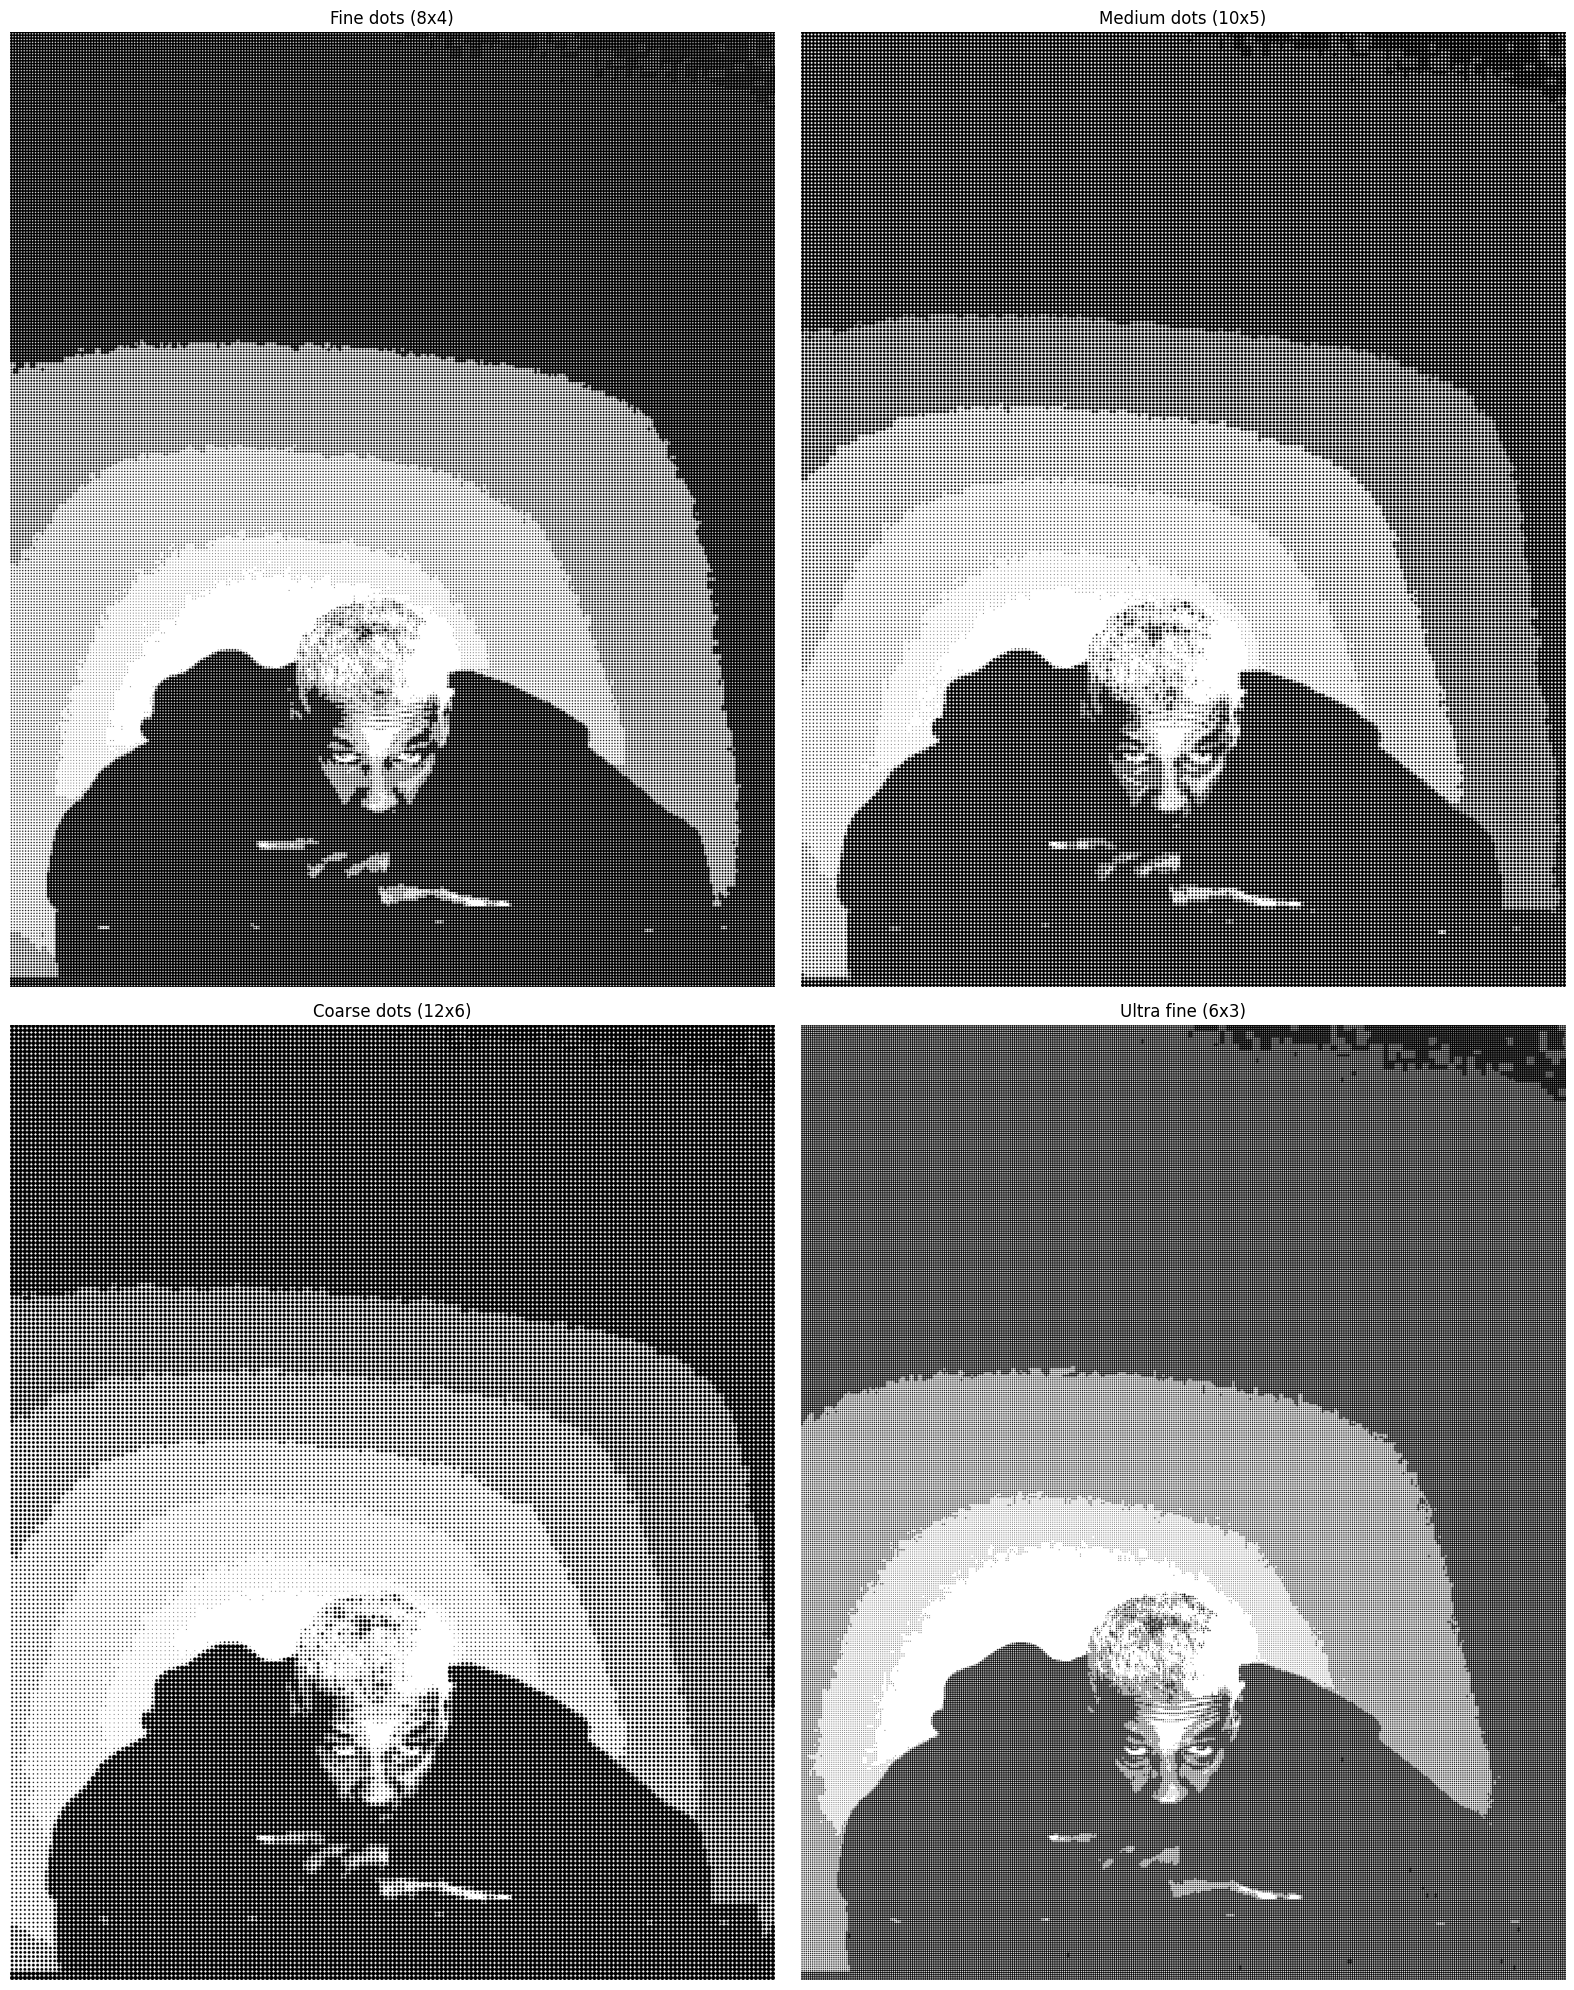

In [5]:
# Test 2: Parameter variations
print("Test 2: Parameter Variations")
print("=" * 50)

# Different parameter sets to test
test_configs = [
    {"cell_size": 8, "max_radius": 4, "name": "Fine dots (8x4)"},
    {"cell_size": 10, "max_radius": 5, "name": "Medium dots (10x5)"},
    {"cell_size": 12, "max_radius": 6, "name": "Coarse dots (12x6)"},
    {"cell_size": 6, "max_radius": 3, "name": "Ultra fine (6x3)"},
]

fig, axes = plt.subplots(2, 2, figsize=(16, 20))

for idx, test_config in enumerate(test_configs):
    config = {
        "cell_size": test_config["cell_size"],
        "max_radius": test_config["max_radius"]
    }
    
    halftone = generate_classic_halftone(
        brightness_map,
        config,
        bg_color,
        dot_color
    )
    
    row = idx // 2
    col = idx % 2
    axes[row, col].imshow(halftone)
    axes[row, col].set_title(test_config["name"])
    axes[row, col].axis('off')

plt.tight_layout()
plt.show()


## Test 3: Gamma Correction Effects

Gamma affects how brightness maps to dot sizes. Lower gamma = more uniform dots, higher gamma = more variation.


Test 3: Gamma Variations


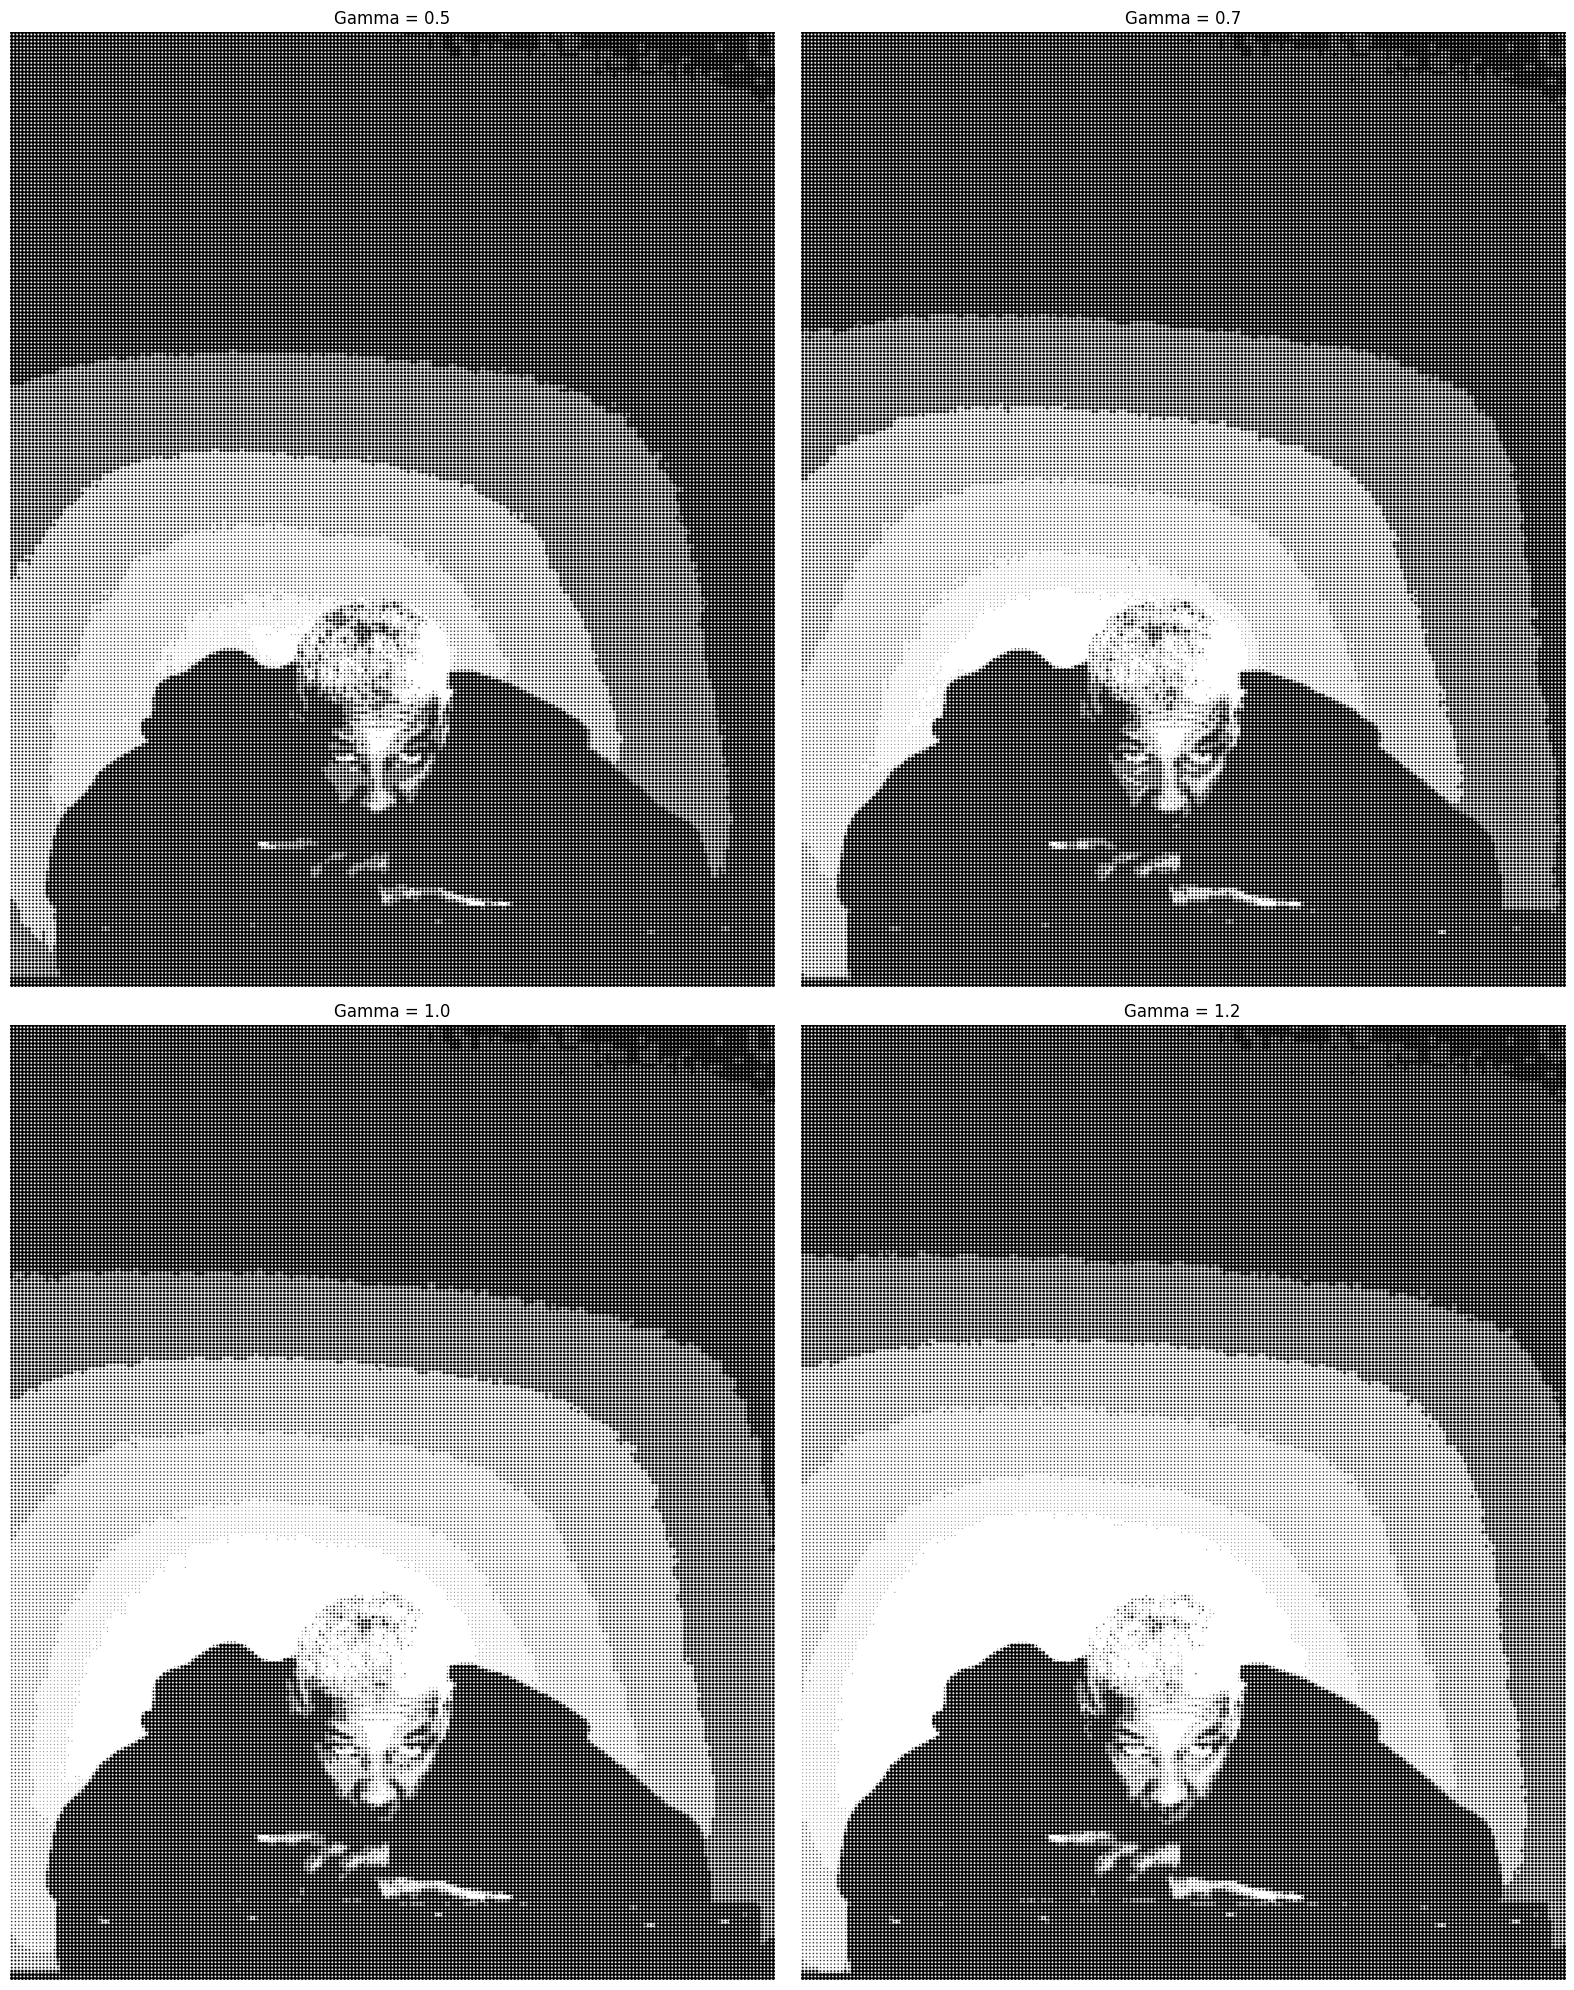

Lower gamma values create more uniform dot sizes (closer to target image)


In [6]:
# Test 3: Gamma variations for more uniform dots
print("Test 3: Gamma Variations")
print("=" * 50)

# Base config
base_config = {
    "cell_size": 10,
    "max_radius": 5
}

# Test different gamma values
# Lower gamma = more uniform dot sizes (closer to target image)
# Higher gamma = more variation in dot sizes
gamma_values = [0.5, 0.7, 1.0, 1.2]

fig, axes = plt.subplots(2, 2, figsize=(16, 20))

for idx, gamma in enumerate(gamma_values):
    halftone = generate_variable_halftone(
        brightness_map,
        base_config,
        bg_color,
        dot_color,
        dot_gamma=gamma
    )
    
    row = idx // 2
    col = idx % 2
    axes[row, col].imshow(halftone)
    axes[row, col].set_title(f'Gamma = {gamma}')
    axes[row, col].axis('off')

plt.tight_layout()
plt.show()

print("Lower gamma values create more uniform dot sizes (closer to target image)")


## Test 4: Preprocessing Variations

Different preprocessing settings can affect contrast and detail preservation.


Test 4: Preprocessing Variations


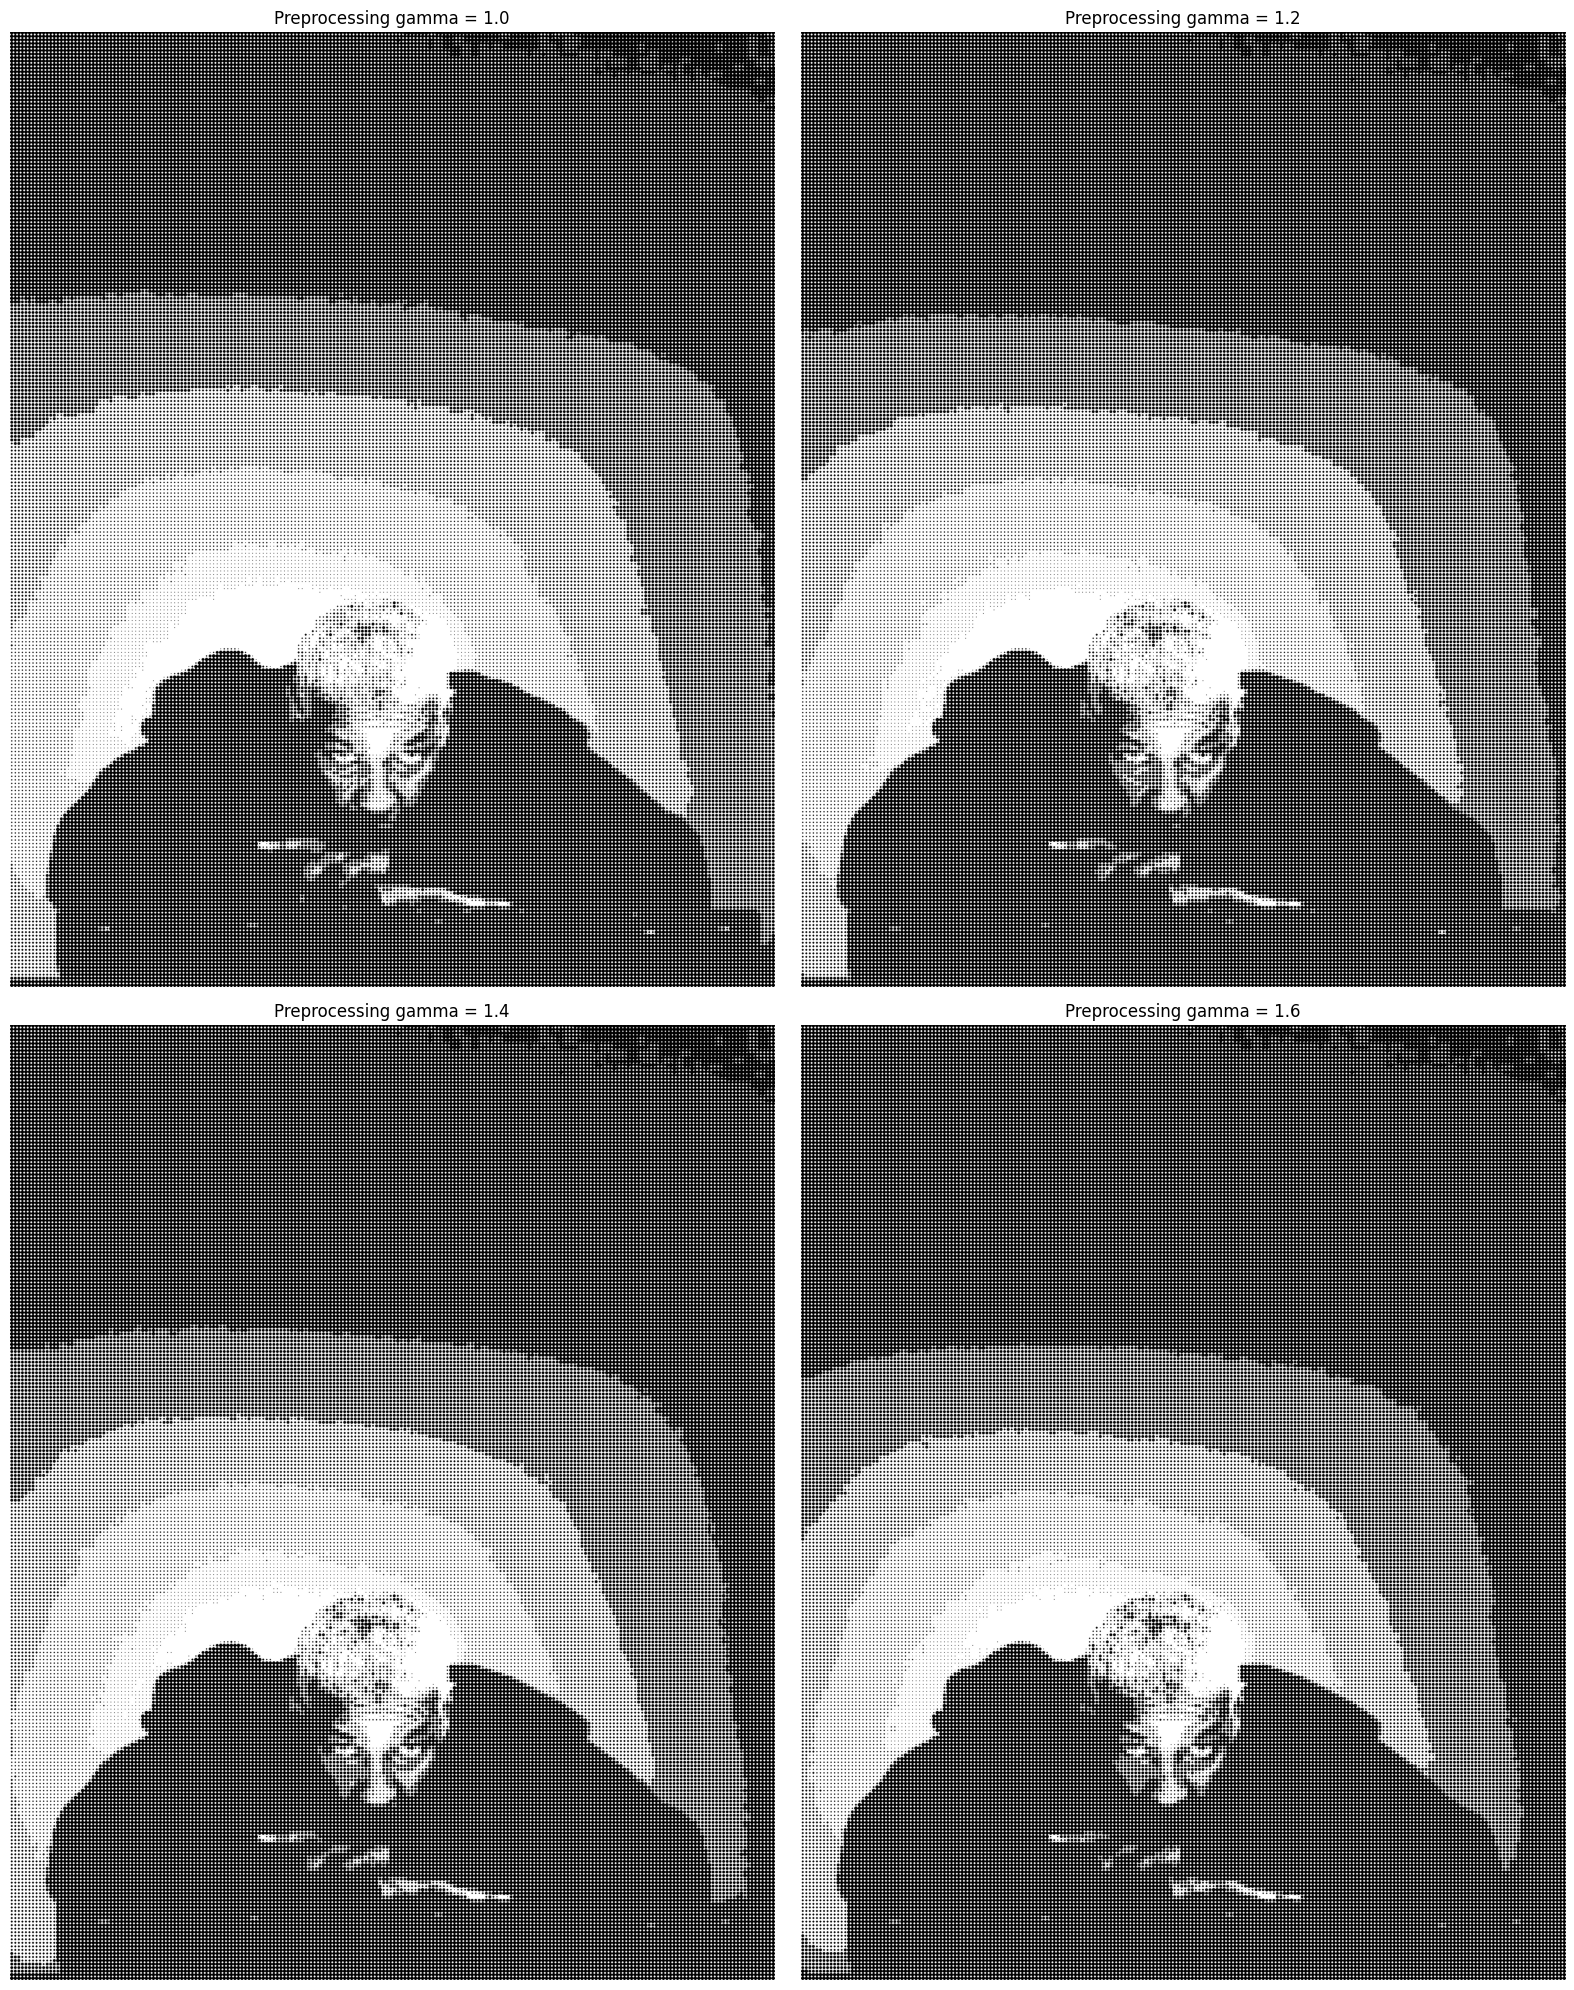

In [7]:
# Test 4: Preprocessing variations
print("Test 4: Preprocessing Variations")
print("=" * 50)

# Test different gamma values in preprocessing
preprocessing_gammas = [1.0, 1.2, 1.4, 1.6]

fig, axes = plt.subplots(2, 2, figsize=(16, 20))

halftone_config = {
    "cell_size": 10,
    "max_radius": 5
}

for idx, gamma in enumerate(preprocessing_gammas):
    # Preprocess with different gamma
    brightness = preprocess_image(
        test_image_path,
        TARGET_WIDTH,
        TARGET_HEIGHT,
        gamma=gamma
    )
    
    # Generate halftone
    halftone = generate_variable_halftone(
        brightness,
        halftone_config,
        bg_color,
        dot_color,
        dot_gamma=0.7  # Use lower gamma for more uniform dots
    )
    
    row = idx // 2
    col = idx % 2
    axes[row, col].imshow(halftone)
    axes[row, col].set_title(f'Preprocessing gamma = {gamma}')
    axes[row, col].axis('off')

plt.tight_layout()
plt.show()


## Test 5: Best Configuration

Based on the tests above, let's find the best configuration that matches the target style.
Fine-tune these parameters:
- **cell_size**: Controls grid spacing (smaller = more detail)
- **max_radius**: Maximum dot size (smaller = more uniform dots)
- **dot_gamma**: Controls dot size distribution (lower = more uniform)
- **preprocessing_gamma**: Controls image contrast before halftone


Test 5: Fine-tuned Configuration


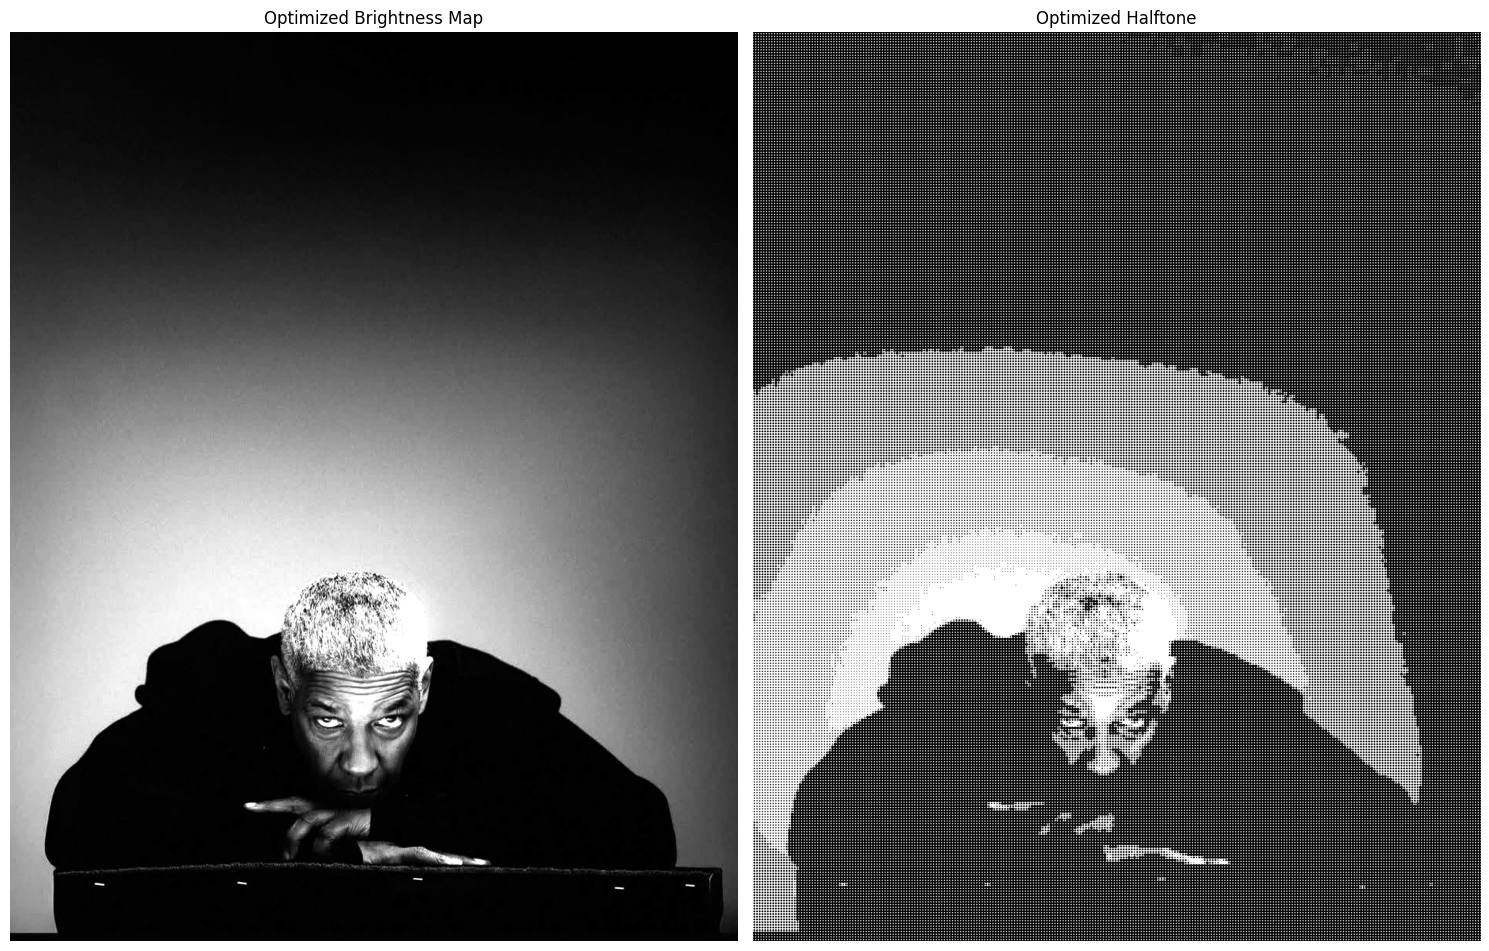

Configuration:
  cell_size: 8
  max_radius: 4
  dot_gamma: 0.6
  preprocessing_gamma: 1.3


In [8]:
# Test 5: Fine-tuned configuration
print("Test 5: Fine-tuned Configuration")
print("=" * 50)

# Best configuration based on target image style:
# - Small, relatively uniform dots
# - High contrast
# - Clean, poster-like quality

BEST_CONFIG = {
    "cell_size": 8,      # Smaller cells for more detail
    "max_radius": 4,      # Smaller max radius for more uniform dots
    "dot_gamma": 0.6,    # Lower gamma for more uniform dot sizes
    "preprocessing_gamma": 1.3  # Higher gamma for better contrast
}

# Preprocess with optimized settings
brightness_optimized = preprocess_image(
    test_image_path,
    TARGET_WIDTH,
    TARGET_HEIGHT,
    gamma=BEST_CONFIG["preprocessing_gamma"]
)

# Generate halftone with optimized settings
halftone_config = {
    "cell_size": BEST_CONFIG["cell_size"],
    "max_radius": BEST_CONFIG["max_radius"]
}

halftone_optimized = generate_variable_halftone(
    brightness_optimized,
    halftone_config,
    bg_color,
    dot_color,
    dot_gamma=BEST_CONFIG["dot_gamma"]
)

# Display
fig, axes = plt.subplots(1, 2, figsize=(15, 18))
axes[0].imshow(brightness_optimized, cmap='gray')
axes[0].set_title('Optimized Brightness Map')
axes[0].axis('off')

axes[1].imshow(halftone_optimized)
axes[1].set_title('Optimized Halftone')
axes[1].axis('off')

plt.tight_layout()
plt.show()

print("Configuration:")
for key, value in BEST_CONFIG.items():
    print(f"  {key}: {value}")


## Test 6: Add Text Overlay (Like "Mumbo Jumbo" in target image)

The target image has text overlay. Let's add text to the halftone image.


Test 6: Text Overlay


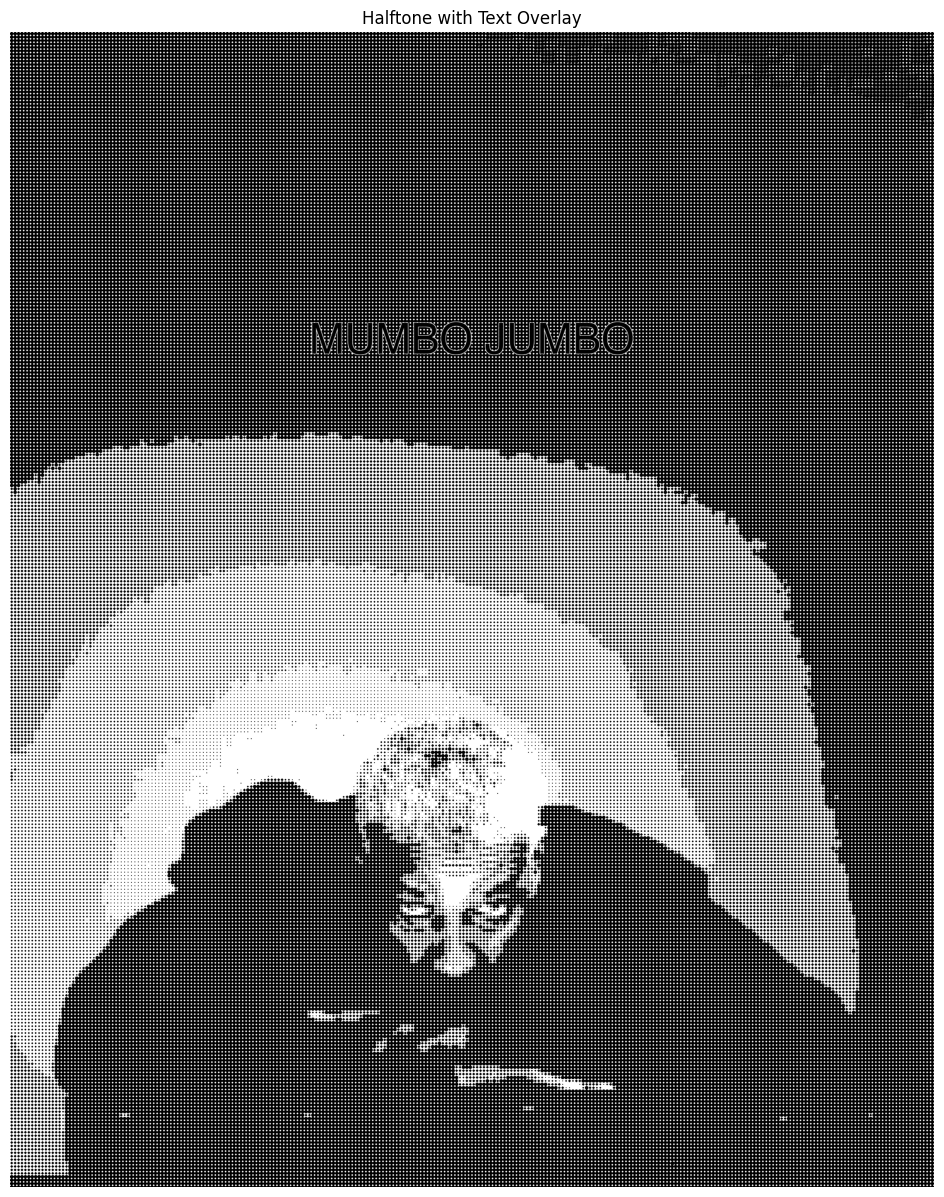

Added text: 'MUMBO JUMBO'


In [9]:
# Test 6: Add text overlay
print("Test 6: Text Overlay")
print("=" * 50)

def add_text_overlay(image, text, position='top', font_size=80, color=(0, 0, 0)):
    """
    Add text overlay to image.
    
    Args:
        image: PIL Image
        text: Text string
        position: 'top', 'center', or 'bottom'
        font_size: Font size in points
        color: Text color RGB tuple
    """
    img = image.copy()
    draw = ImageDraw.Draw(img)
    
    # Try to load a bold font, fallback to default if not available
    try:
        # Try common system fonts
        font_paths = [
            '/System/Library/Fonts/Helvetica.ttc',
            '/System/Library/Fonts/Supplemental/Arial Bold.ttf',
            '/usr/share/fonts/truetype/dejavu/DejaVuSans-Bold.ttf',
        ]
        font = None
        for path in font_paths:
            if Path(path).exists():
                font = ImageFont.truetype(path, font_size)
                break
        if font is None:
            font = ImageFont.load_default()
    except:
        font = ImageFont.load_default()
    
    # Get text bounding box
    bbox = draw.textbbox((0, 0), text, font=font)
    text_width = bbox[2] - bbox[0]
    text_height = bbox[3] - bbox[1]
    
    # Calculate position
    img_width, img_height = img.size
    x = (img_width - text_width) // 2
    
    if position == 'top':
        y = img_height // 4  # Upper-middle section
    elif position == 'center':
        y = (img_height - text_height) // 2
    elif position == 'bottom':
        y = img_height - text_height - 50
    else:
        y = img_height // 4
    
    # Draw text with slight offset for better visibility
    # Draw multiple times for bold effect
    offsets = [(-1, -1), (-1, 0), (-1, 1), (0, -1), (0, 1), (1, -1), (1, 0), (1, 1)]
    for dx, dy in offsets:
        draw.text((x + dx, y + dy), text, font=font, fill=(255, 255, 255))  # White outline
    
    # Draw main text
    draw.text((x, y), text, font=font, fill=color)
    
    return img

# Add text overlay
text = "MUMBO JUMBO"
halftone_with_text = add_text_overlay(
    halftone_optimized,
    text,
    position='top',
    font_size=100,
    color=(0, 0, 0)  # Black text
)

# Display
plt.figure(figsize=(12, 15))
plt.imshow(halftone_with_text)
plt.title('Halftone with Text Overlay')
plt.axis('off')
plt.show()

print(f"Added text: '{text}'")


In [10]:
# Test 7: Save results
print("Test 7: Saving Results")
print("=" * 50)

output_dir = Path('../output')
output_dir.mkdir(exist_ok=True)

# Save optimized halftone
output_path = output_dir / 'halftone_test_optimized.png'
halftone_optimized.save(output_path, quality=95, dpi=(300, 300))
print(f"Saved: {output_path}")

# Save with text
output_path_text = output_dir / 'halftone_test_with_text.png'
halftone_with_text.save(output_path_text, quality=95, dpi=(300, 300))
print(f"Saved: {output_path_text}")

print("\nYou can now compare these results with the target image and adjust parameters as needed.")


Test 7: Saving Results
Saved: ../output/halftone_test_optimized.png
Saved: ../output/halftone_test_with_text.png

You can now compare these results with the target image and adjust parameters as needed.


## Parameter Tuning Guide

### Key Parameters Explained:

1. **cell_size** (8-12 recommended)
   - Controls the grid spacing between dots
   - Smaller = more detail but potentially noisier
   - Larger = bolder, more graphic look
   - For target style: 8-10 works well

2. **max_radius** (3-5 recommended)
   - Maximum dot radius in pixels
   - Smaller = more uniform dots (closer to target)
   - Larger = more variation in dot sizes
   - For target style: 4-5 works well

3. **dot_gamma** (0.5-0.7 recommended for uniform dots)
   - Controls how brightness maps to dot size
   - Lower (0.5-0.6) = more uniform dot sizes
   - Higher (0.8-1.0) = more variation in dot sizes
   - For target style: 0.6-0.7 works well

4. **preprocessing_gamma** (1.2-1.4 recommended)
   - Controls image contrast before halftone
   - Higher = more contrast, darker shadows
   - Lower = softer, less contrast
   - For target style: 1.3 works well

### Fine-tuning Tips:

- If dots are too varied in size → lower `dot_gamma` (try 0.5-0.6)
- If image lacks detail → decrease `cell_size` (try 6-8)
- If image is too dark → lower `preprocessing_gamma` (try 1.0-1.2)
- If image is too light → increase `preprocessing_gamma` (try 1.4-1.6)
- If dots are too large → decrease `max_radius` (try 3-4)
- If dots are too small → increase `max_radius` (try 5-6)
